# ✅ 1-БӨЛІМ. KNN — ТАПСЫРМАЛАР

## 🔹 Тапсырма 1 (Beginner)
**Мақсаты:** KNN классификациясын үйрену
1. Iris датасетін жүкте
2. Деректі 80% / 20% бөліп бөл
3. k=3 және k=7 үшін:
  - - модель құр
  - - accuracy есепте
  - - Нәтижені салыстыр

✅ Тапсыру керек:
 - Accuracy мәндері
 - Қай k жақсы екенін қорытындылау


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Iris датасетін жүкте
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Деректі 80% / 20% бөліп бөл
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# k=3 және k=7 үшін:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn7 = KNeighborsClassifier(n_neighbors=7)

In [6]:
# модельдерді жаттықтыру
knn3.fit(X_train, y_train)
knn7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [7]:
# Жаңа мәліметтерді болжау
y_pred_knn3 = knn3.predict(X_test)
y_pred_knn7 = knn7.predict(X_test)

In [8]:
# accuracy есепте
print(f"Accuracy for k=3: {accuracy_score(y_test, y_pred_knn3)}")
print(f"Accuracy for k=7: {accuracy_score(y_test, y_pred_knn7)}")

Accuracy for k=3: 0.9333333333333333
Accuracy for k=7: 0.9333333333333333


## 🔹 Тапсырма 2 (Intermediate)
1. KNN үшін feature scaling (StandardScaler) қолдан
2. Масштабтауға дейін және кейін accuracy салыстыр
3. Қайсысы жақсы жұмыс істегенін түсіндір


In [9]:
# Масштабтаусыз KNN модель
knn_ = KNeighborsClassifier(n_neighbors = 5)
knn_.fit(X_train, y_train)

# X_train масштабтау
scaler = StandardScaler()
X_scal = scaler.fit_transform(X_train)

# # Масштабтаумен KNN модель
knn_scaler = KNeighborsClassifier(n_neighbors = 5)
knn_scaler.fit(X_scal, y_train)

# Болжам жасау
y_pred_ = knn_.predict(X_test)
y_pred_scaler = knn_scaler.predict(scaler.fit_transform(X_test))

print(f"Accuracy without scaling: {accuracy_score(y_test, y_pred_)}")
print(f"Accuracy with scaling: {accuracy_score(y_test, y_pred_scaler)}")

Accuracy without scaling: 0.9333333333333333
Accuracy with scaling: 0.9


## 🔹 Тапсырма 3 (Advanced)
1. K мәнін [1–20] аралығында өзгертіп
2. Әр k үшін accuracy есептеп
3. График сал (k vs accuracy)
4. Оптималды K таңда


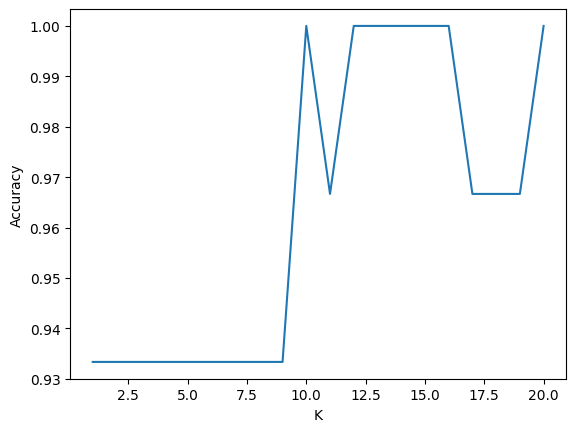

In [10]:
k = np.arange(1, 21)
acc = [
    accuracy_score(
        y_test,
        KNeighborsClassifier(n_neighbors = (i + 1)).fit(X_train, y_train).predict(X_test)
    ) for i in range(20)
]
plt.plot(k, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

# ✅ 2-БӨЛІМ. SVM — ТАПСЫРМАЛАР

## 🔹 Тапсырма 4 (Beginner)
Iris датасетіне:
 - linear
 - rbf
 - poly kernel қолданып көр
 - Accuracy салыстыр

✅ Қорытынды жаса:
 - Қай kernel жақсы?
 - Неге?




In [11]:
from sklearn.svm import SVC

In [12]:
kernels = ['linear', 'rbf', 'poly']
acccuracy = []
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acccuracy.append(accuracy_score(y_test, y_pred))
    print(f"Accuracy for {kernel} kernel: {accuracy_score(y_test, y_pred)}")

Accuracy for linear kernel: 0.9666666666666667
Accuracy for rbf kernel: 0.9666666666666667
Accuracy for poly kernel: 0.9333333333333333


## 🔹 Тапсырма 5 (Intermediate)
1. C параметрін өзгертіңіз: 0.1, 1, 10
2. Әрқайсысына accuracy есептеңіз
3. Overfitting бар-жоғын талдаңыз


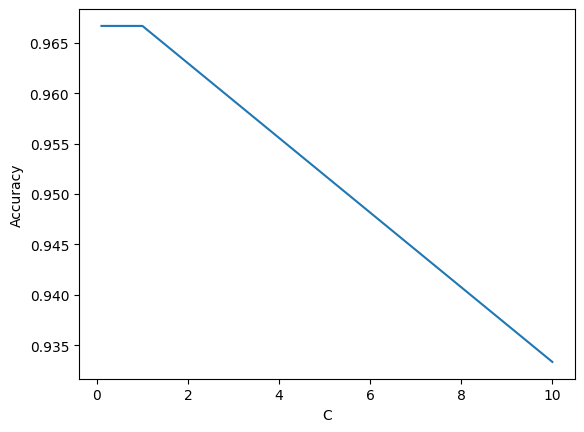

In [13]:
C = np.array([0.1, 1, 10])
acc = [
    accuracy_score(
        y_test,
        SVC(kernel='linear', C=c).fit(X_train, y_train).predict(X_test)
    ) for c in C
]
plt.plot(C, acc)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

## 🔹 Тапсырма 6 (Advanced)
1. GridSearchCV арқылы:
    - C
    - gamma
 параметрлерін оптимизациялаңыз
2. Ең үздік модельдің accuracy шығарыңыз


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10]  # RBF kernel үшін
}
grid_search = GridSearchCV(SVC(), param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best accuracy: 0.9916666666666668


# ✅ 3-БӨЛІМ. NAIVE BAYES — ТАПСЫРМАЛАР

## 🔹 Тапсырма 7 (Beginner)
1. GaussianNB моделін үйрет
2. Confusion Matrix құр
3. Accuracy + Precision + Recall есепте


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

data = load_iris()
X = data.data
y = data.target

# Екі класқа шектеу (binary classification) мысалы үшін
X = X[y != 2]
y = y[y != 2]

# 2️⃣ Train/test бөлу
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Модель
model = GaussianNB()
model.fit(X_train, y_train)

# Жаңа үлгіні болжау
y_pred = model.predict(X_test)

# 6️⃣ Метрикалар
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# 7️⃣ Нәтижелерді шығару
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Matrix:
 [[17  0]
 [ 0 13]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


## 🔹 Тапсырма 8 (Intermediate)
1. 20 Newsgroups датасетін жүкте
2. Мәтінді TF-IDF арқылы векторизацияла
3. MultinomialNB қолдан
4. Spam / Not Spam классификация жаса


In [17]:
# lines = None
# with open("/content/sample_data/20ng-no-short.txt", "r") as f:
#     lines = f.readlines()
# lines[0].replace("\t", " ").split(" ", 1)

# # Ары қарай 8-9 түсініксіз, датасет дұрысын таба алмадым

## 🔹 Тапсырма 9 (Advanced)
1. Naive Bayes-ті:
   - KNN
   - Decision Tree модельдерімен салыстыр
2. Қайсысы мәтінге жақсы екенін дәлелде


In [18]:
# ?

# ✅ 4-БӨЛІМ. DECISION TREE — ТАПСЫРМАЛАР

## 🔹 Тапсырма 10 (Beginner)
1. Decision Tree үйрет
2. max_depth = 2, 4, 6 үшін accuracy есепте
3. Overfitting қай кезде шыққанын анықта


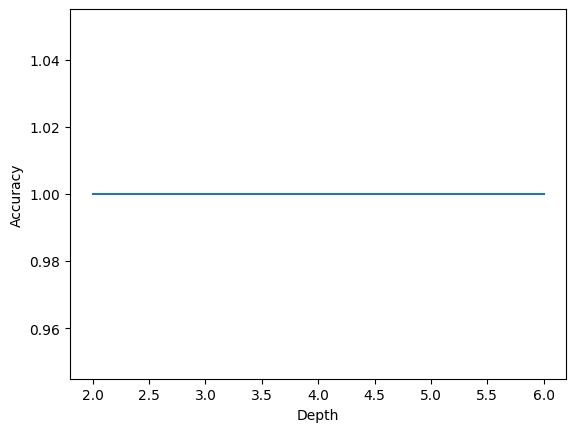

In [23]:
from sklearn.tree import DecisionTreeClassifier

depths = [2, 4, 6]
acc = [
    accuracy_score(
        y_test,
        DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train).predict(X_test)
    ) for depth in depths
]
plt.plot(depths, acc)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

## 🔹 Тапсырма 11 (Intermediate)
1. Ағашты визуализацияла:
   -
   ```python
   from sklearn.tree import plot_tree
   ```
2. Қай feature ең маңызды екенін анықта


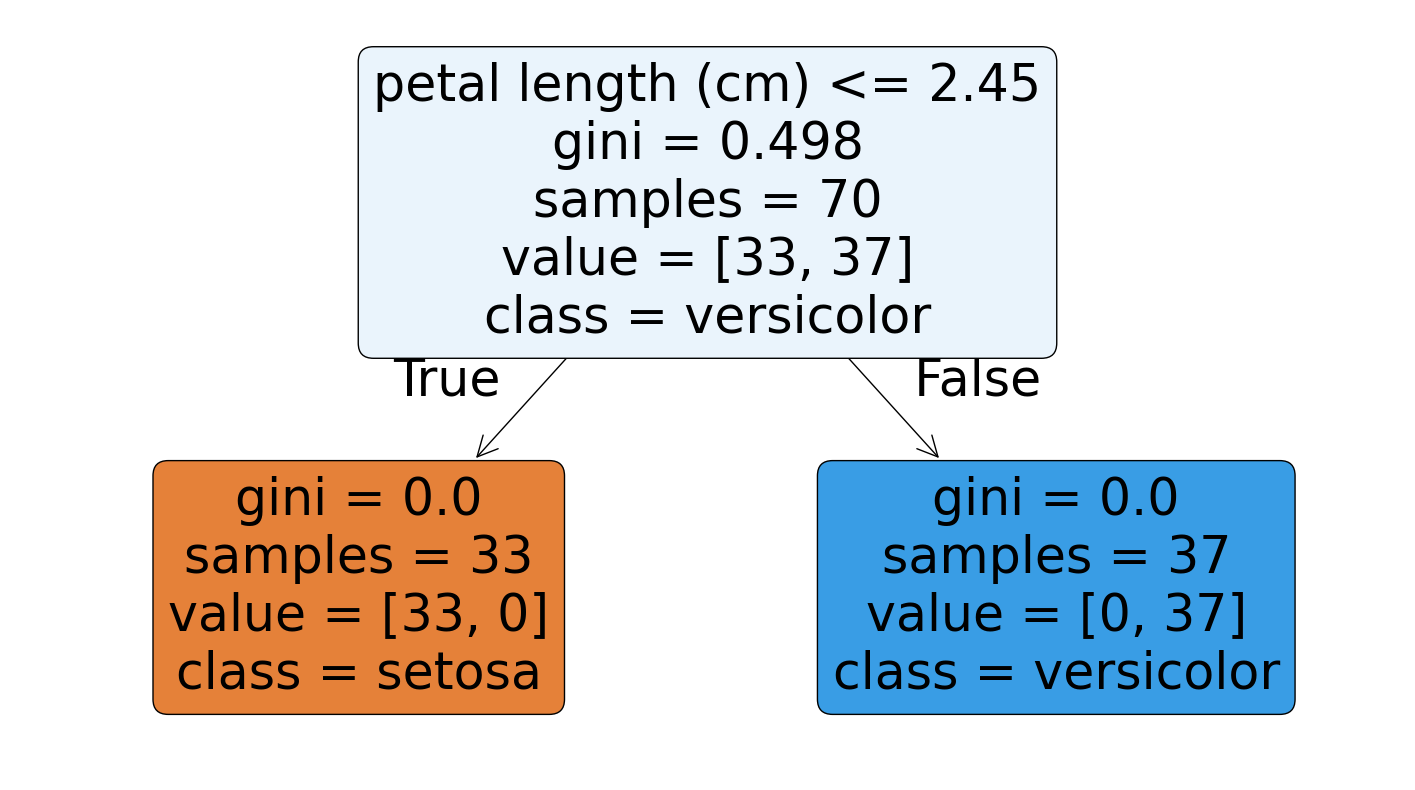

In [26]:
from sklearn.tree import plot_tree

feature_names = load_iris().feature_names
class_names = load_iris().target_names

model = DecisionTreeClassifier(
    max_depth=3,
    criterion="gini",
    random_state=42
)
model.fit(X_train, y_train)

plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True
)
plt.show()

## 🔹 Тапсырма 12 (Advanced)
1. Decision Tree vs Random Forest салыстыр
2. Қайсысы:
   - дәлірек
   - тұрақты екенін дәлелде


In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X, y = load_breast_cancer(return_X_y=True)

dt_scores = []
rf_scores = []

for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed
    )

    dt = DecisionTreeClassifier(random_state=seed)
    rf = RandomForestClassifier(n_estimators=100, random_state=seed)

    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    dt_scores.append(accuracy_score(y_test, dt.predict(X_test)))
    rf_scores.append(accuracy_score(y_test, rf.predict(X_test)))

print("Decision Tree accuracy:", dt_scores)
print("Random Forest accuracy:", rf_scores)

print("DT mean:", np.mean(dt_scores), "STD:", np.std(dt_scores))
print("RF mean:", np.mean(rf_scores), "STD:", np.std(rf_scores))


Decision Tree accuracy: [0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9005847953216374, 0.9239766081871345, 0.9298245614035088, 0.9239766081871345, 0.9239766081871345, 0.9298245614035088]
Random Forest accuracy: [0.9590643274853801, 0.9473684210526315, 0.9590643274853801, 0.9473684210526315, 0.935672514619883, 0.9766081871345029, 0.9649122807017544, 0.9824561403508771, 0.9707602339181286, 0.9590643274853801]
DT mean: 0.9251461988304094 STD: 0.011637279966159306
RF mean: 0.9602339181286549 STD: 0.01353899052957922


# ✅ 5-БӨЛІМ. КЛАСТЕРЛЕУ — ТАПСЫРМАЛАР


## 🔹 Тапсырма 13 (Beginner)
1. K-Means арқылы 3 кластер құр
2. PCA арқылы 2D визуализация жаса
3. Әр кластердің центрін көрсет


In [ ]:
# --- Тым тез кетіп барамыз, қорытып үлгере алмаудамын